# California Housing Data Analysis
This notebook explores the California Housing dataset from sklearn, covering data extraction, cleaning, transformation, and visualization.

In [23]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the dataset
california = fetch_california_housing()

# Create a DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target  # Add target variable (Median house value)

# Show the first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## Data Exploration: Overview of the Dataset
We will explore the structure of the dataset and check for missing values.

In [25]:
# Basic info about the dataset
print("Shape of the dataset:", df.shape)
df.info()

Shape of the dataset: (20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [26]:
# Summary statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [27]:
# Check for missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

## Data Cleaning: Handling Outliers
We will check for outliers using boxplots and remove or cap them as needed.

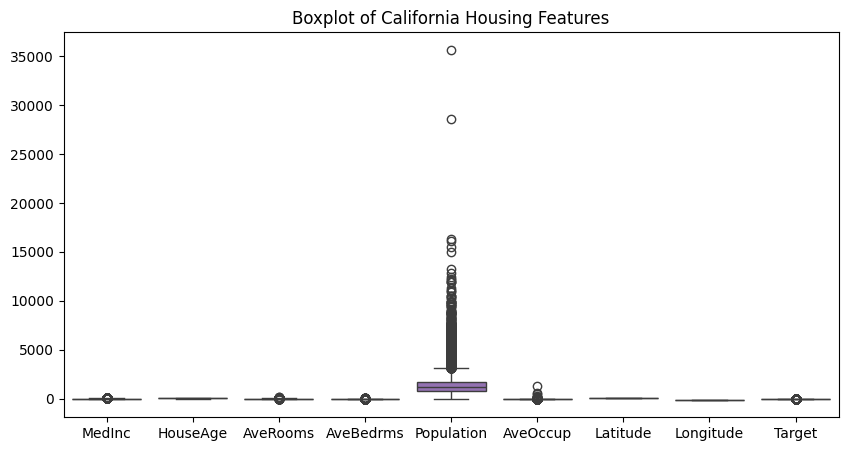

In [28]:
# Boxplot of all features to check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title("Boxplot of California Housing Features")
plt.show()

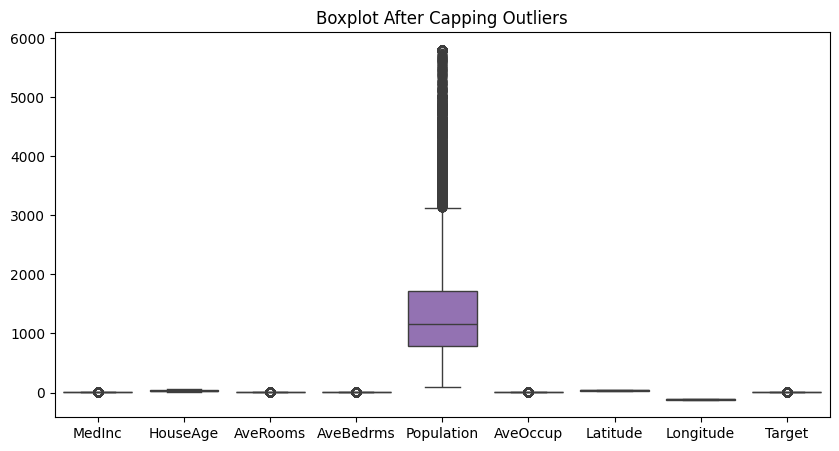

In [29]:

# Handling outliers: We'll cap values beyond the 99th percentile
for col in df.columns:
    df[col] = df[col].clip(lower=df[col].quantile(0.01), upper=df[col].quantile(0.99))

# Verify if outliers were capped
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title("Boxplot After Capping Outliers")
plt.show()

In [30]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

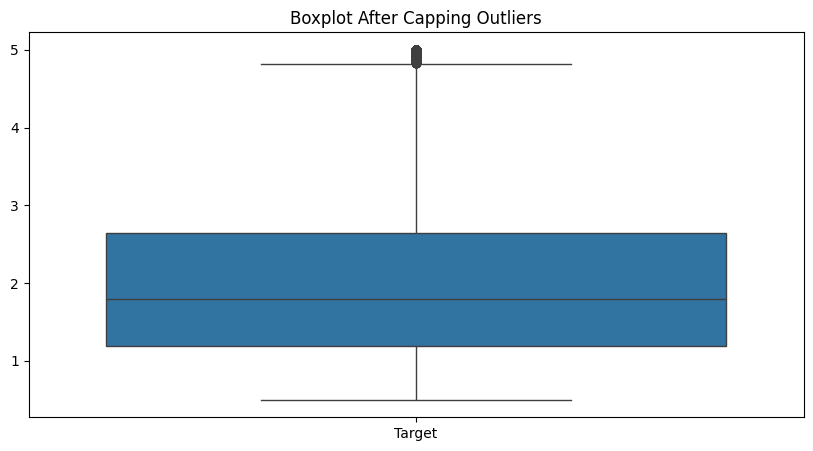

In [31]:

# Handling outliers: We'll cap values beyond the 99th percentile (numbers on boundary will repeat)
for col in df.columns:
    df[col] = df[col].clip(lower=df[col].quantile(0.01), upper=df[col].quantile(0.99))

# Verify if outliers were capped
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Target']])
plt.title("Boxplot After Capping Outliers")
plt.show()

## Data Transformation: Standardization
We'll standardize the features to have a mean of 0 and a standard deviation of 1.

https://medium.com/codex/why-scaling-your-data-is-important-1aff95ca97a2

In [32]:
# Standardizing the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('Target', axis=1)), columns=df.columns[:-1])
df_scaled['Target'] = df['Target']

# Show the scaled features
df_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,2.479690,0.982870,1.248502,-0.336028,-1.112177,-0.492730,1.060389,-1.346081,4.526
1,2.466496,-0.608654,0.684020,-0.663593,1.024796,-1.101416,1.050972,-1.341022,3.585
2,1.887730,1.858207,2.235230,-0.022922,-0.933325,-0.155820,1.046263,-1.351141,3.521
3,0.992806,1.858207,0.365617,-0.025363,-0.869596,-0.503123,1.046263,-1.356201,3.413
4,-0.003347,1.858207,0.717100,0.025237,-0.862400,-1.003601,1.046263,-1.356201,3.422


## Data Visualization: Correlation Heatmap and Distributions
We will create visualizations to explore relationships in the data.

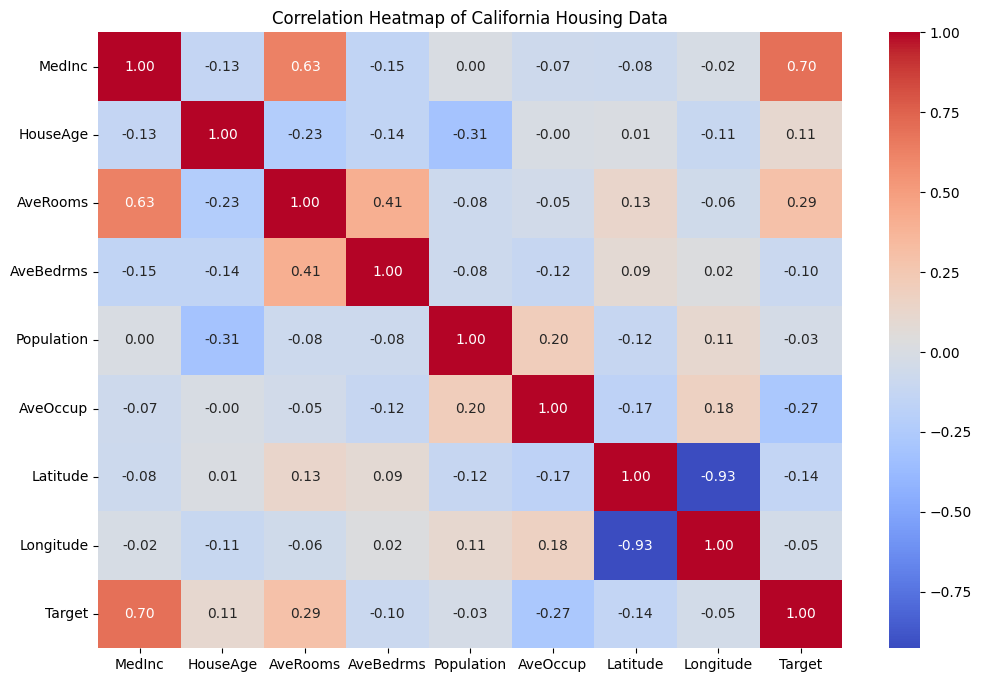

In [33]:
# Correlation heatmap of the features
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of California Housing Data")
plt.show()

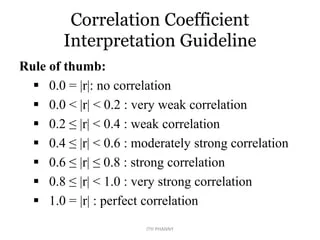

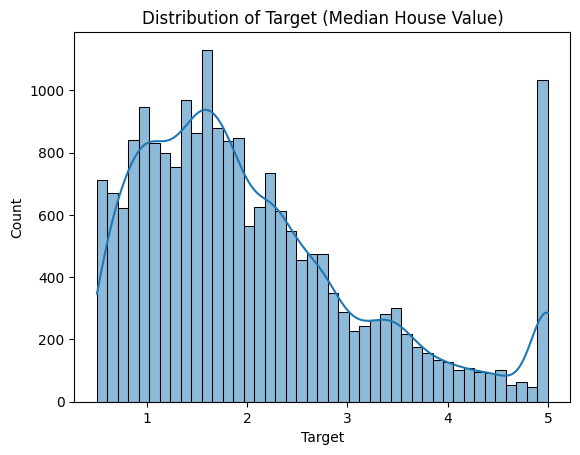

In [34]:
# Distribution of the target variable
sns.histplot(df_scaled['Target'], kde=True)
plt.title("Distribution of Target (Median House Value)")
plt.show()

## Conclusion
- The dataset was cleaned, outliers were capped, and the features were standardized.
- We visualized the relationships between features and checked the distribution of the target variable.
- Further analysis could include modeling the data for prediction or regression tasks.